# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database
conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [3]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(ProductName)
    FROM Products
    WHERE Price < 10;
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [14]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(Country) AS Origin_count
    FROM Suppliers
    GROUP BY Country
    ORDER BY Origin_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
for r in rows:
    print(r)

('USA', 4)
('Germany', 3)
('France', 3)
('UK', 2)
('Sweden', 2)
('Japan', 2)
('Italy', 2)
('Canada', 2)
('Australia', 2)
('Spain', 1)
('Singapore', 1)
('Norway', 1)
('Netherlands', 1)
('Finland', 1)
('Denmark', 1)
('Brazil', 1)


    Country  Origin_count
        USA             4
    Germany             3
     France             3
         UK             2
     Sweden             2
      Japan             2
      Italy             2
     Canada             2
  Australia             2
      Spain             1
  Singapore             1
     Norway             1
Netherlands             1
    Finland             1
    Denmark             1
     Brazil             1


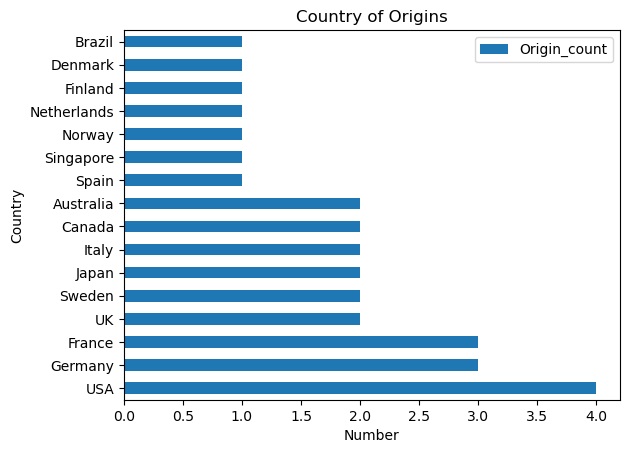

In [15]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Origin_count'])
#print(df)
print(df.to_string(index=False))

# TODO: Generate a visualization on this dataframe
df.plot.barh(x= 'Country', y = 'Origin_count')
plt.title("Country of Origins")
plt.xlabel("Number")
plt.ylabel("Country")
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [16]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(Country) AS Origin
    FROM Customers
    GROUP BY Country
    ORDER BY Origin DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
for r in rows:
    print(r)

('USA', 13)
('Germany', 11)
('France', 11)
('Brazil', 9)
('UK', 7)
('Spain', 5)
('Mexico', 5)
('Venezuela', 4)
('Italy', 3)
('Canada', 3)
('Argentina', 3)
('Switzerland', 2)
('Sweden', 2)
('Portugal', 2)
('Finland', 2)
('Denmark', 2)
('Belgium', 2)
('Austria', 2)
('Poland', 1)
('Norway', 1)
('Ireland', 1)


    Country  Origin
        USA      13
    Germany      11
     France      11
     Brazil       9
         UK       7
      Spain       5
     Mexico       5
  Venezuela       4
      Italy       3
     Canada       3
  Argentina       3
Switzerland       2
     Sweden       2
   Portugal       2
    Finland       2
    Denmark       2
    Belgium       2
    Austria       2
     Poland       1
     Norway       1
    Ireland       1


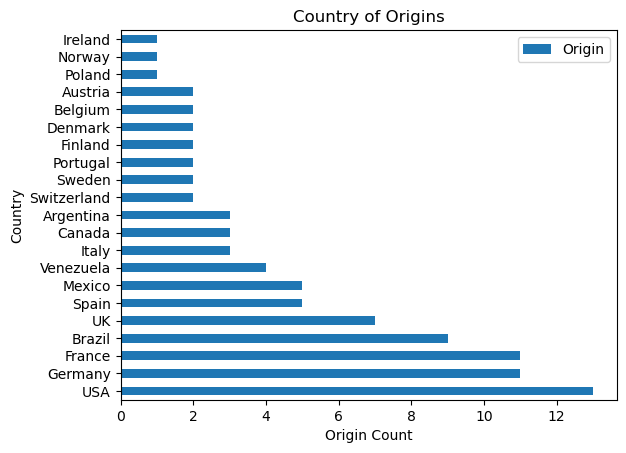

In [18]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'Origin'])
print(df.to_string(index=False))

# TODO: Generate a visualization on this dataframe
df.plot.barh(x= 'Country', y = 'Origin')
plt.title("Country of Origins")
plt.xlabel("Origin Count")
plt.ylabel("Country")
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [34]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT ProductName, SUM(od.Quantity) as TotalQuantity
    FROM OrderDetails as od
    JOIN Products as p ON od.ProductID = p.ProductID
    Group BY ProductName
    ORDER BY TotalQuantity ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
for r in rows:
    print(r)

('Laughing Lumberjack Lager', 5)
('Røgede sild', 15)
("Gustaf's Knäckebröd", 18)
('Mishi Kobe Niku', 20)
('Genen Shouyu', 25)
("Uncle Bob's Organic Dried Pears", 25)
('Queso Manchego La Pastora', 27)
("Grandma's Boysenberry Spread", 36)
('Gravad lax', 39)
('Röd Kaviar', 45)
('Filo Mix', 48)
('Mascarpone Fabioli', 52)
('Chocolade', 70)
('Valkoinen suklaa', 70)
('NuNuCa Nuß-Nougat-Creme', 71)
('Singaporean Hokkien Fried Mee', 77)
('Aniseed Syrup', 80)
('Ikura', 85)
('Louisiana Hot Spiced Okra', 90)
('Schoggi Schokolade', 90)


                    ProductName  OrderID
      Laughing Lumberjack Lager        5
                    Røgede sild       15
            Gustaf's Knäckebröd       18
                Mishi Kobe Niku       20
                   Genen Shouyu       25
Uncle Bob's Organic Dried Pears       25
      Queso Manchego La Pastora       27
   Grandma's Boysenberry Spread       36
                     Gravad lax       39
                     Röd Kaviar       45
                       Filo Mix       48
             Mascarpone Fabioli       52
                      Chocolade       70
               Valkoinen suklaa       70
        NuNuCa Nuß-Nougat-Creme       71
  Singaporean Hokkien Fried Mee       77
                  Aniseed Syrup       80
                          Ikura       85
      Louisiana Hot Spiced Okra       90
             Schoggi Schokolade       90


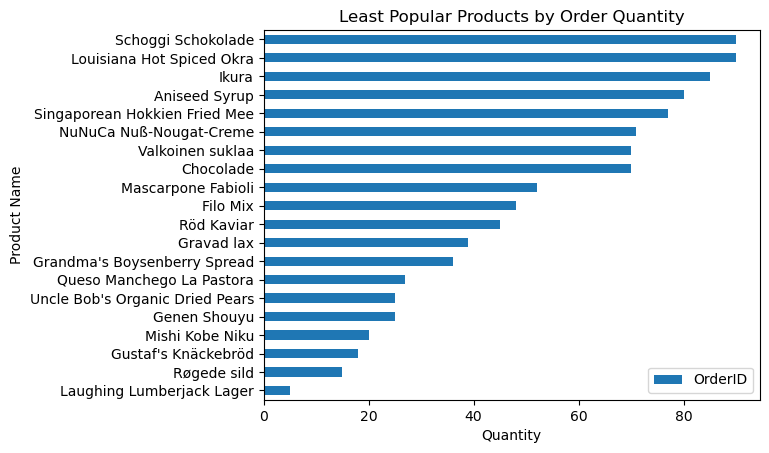

In [36]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'OrderID'])
print(df.to_string(index=False))

# TODO: Generate a visualization on this dataframe
df.plot.barh(x= 'ProductName', y = 'OrderID')
plt.title("Least Popular Products by Order Quantity")
plt.xlabel("Quantity")
plt.ylabel("Product Name")
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.

#Here I will create a join on the columns 'OrderDetails' and 'Products'. In order to get the total revenue we need to calculate the order quantity and price
# and save that under a new column 'TotalRevenue'
cursor.execute("""
    SELECT ProductName, SUM(Quantity * Price) as TotalRevenue
    FROM OrderDetails as od
    JOIN Products as p ON od.ProductID = p.ProductID
    Group BY ProductName
    ORDER BY TotalRevenue ASC
    LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
for r in rows:
    print(r)

('Laughing Lumberjack Lager', 70)
('Røgede sild', 142.5)
('Filo Mix', 336)
("Gustaf's Knäckebröd", 378)
('Genen Shouyu', 387.5)
('Konbu', 552)
('Röd Kaviar', 675)
('Guaraná Fantástica', 711.0)
("Uncle Bob's Organic Dried Pears", 750)
('Geitost', 790.0)
('Aniseed Syrup', 800)
('Chocolade', 892.5)
("Grandma's Boysenberry Spread", 900)
('Zaanse koeken', 959.5)
('NuNuCa Nuß-Nougat-Creme', 994)
('Gravad lax', 1014)
('Queso Manchego La Pastora', 1026)
('Singaporean Hokkien Fried Mee', 1078)
('Rhönbräu Klosterbier', 1116.0)
('Valkoinen suklaa', 1137.5)


                    ProductName  TotalRevenue
      Laughing Lumberjack Lager          70.0
                    Røgede sild         142.5
                       Filo Mix         336.0
            Gustaf's Knäckebröd         378.0
                   Genen Shouyu         387.5
                          Konbu         552.0
                     Röd Kaviar         675.0
             Guaraná Fantástica         711.0
Uncle Bob's Organic Dried Pears         750.0
                        Geitost         790.0
                  Aniseed Syrup         800.0
                      Chocolade         892.5
   Grandma's Boysenberry Spread         900.0
                  Zaanse koeken         959.5
        NuNuCa Nuß-Nougat-Creme         994.0
                     Gravad lax        1014.0
      Queso Manchego La Pastora        1026.0
  Singaporean Hokkien Fried Mee        1078.0
           Rhönbräu Klosterbier        1116.0
               Valkoinen suklaa        1137.5


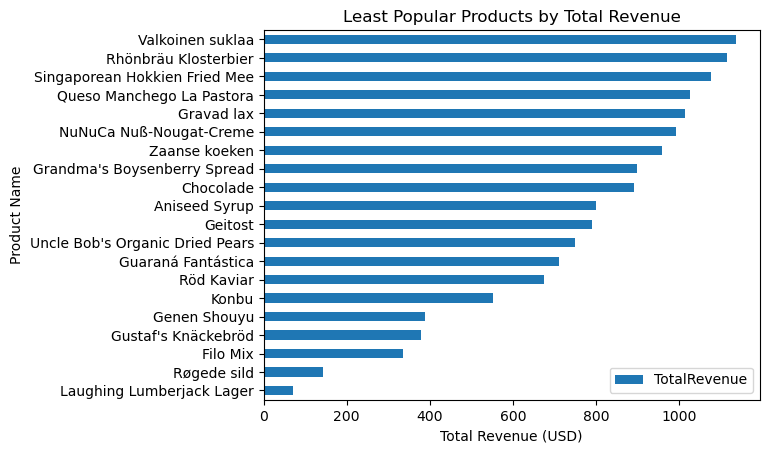

In [ ]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])
print(df.to_string(index=False))

# TODO: Generate a visualization on this dataframe
df.plot.barh(x= 'ProductName', y = 'TotalRevenue')
plt.title("Least Popular Products by Total Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [ ]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
    SELECT c.Country,COUNT(o.OrderID) AS TotalOrders
    FROM Customers AS c
    JOIN Orders AS o ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
    ORDER BY TotalOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
for r in rows:
    print(r)

('USA', 29)
('Germany', 25)
('Brazil', 19)
('France', 18)
('Austria', 13)
('UK', 12)
('Venezuela', 9)
('Mexico', 9)
('Canada', 9)
('Finland', 8)
('Sweden', 7)
('Spain', 7)
('Italy', 7)
('Ireland', 6)
('Portugal', 5)
('Switzerland', 4)
('Denmark', 4)
('Belgium', 2)
('Poland', 1)
('Norway', 1)
('Argentina', 1)


    Country  TotalOrders
        USA           29
    Germany           25
     Brazil           19
     France           18
    Austria           13
         UK           12
  Venezuela            9
     Mexico            9
     Canada            9
    Finland            8
     Sweden            7
      Spain            7
      Italy            7
    Ireland            6
   Portugal            5
Switzerland            4
    Denmark            4
    Belgium            2
     Poland            1
     Norway            1
  Argentina            1


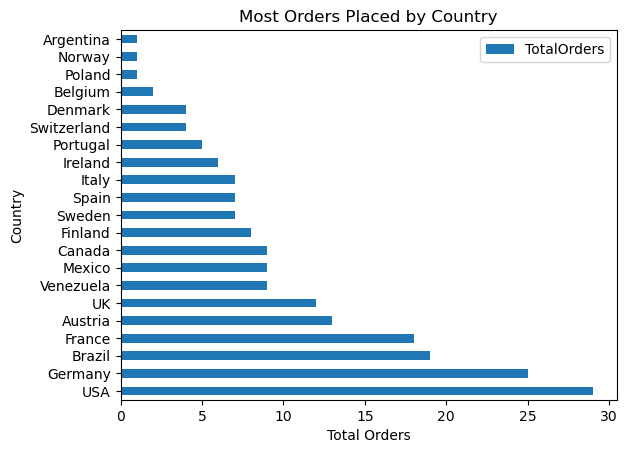

In [48]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'TotalOrders'])
print(df.to_string(index=False))

# TODO: Generate a visualization on this dataframe
df.plot.barh(x= 'Country', y = 'TotalOrders')
plt.title("Most Orders Placed by Country")
plt.xlabel("Total Orders")
plt.ylabel("Country")
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [52]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT c.Country, COUNT(c.CustomerID) AS TotalCustomerswithNoOrders
    FROM Customers AS c
    LEFT JOIN Orders AS o ON c.CustomerID = o.CustomerID
    WHERE o.OrderID IS NULL
    GROUP BY c.Country
    ORDER BY TotalCustomerswithNoOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
for r in rows:
    print(r)

('USA', 5)
('France', 4)
('Germany', 2)
('Argentina', 2)
('UK', 1)
('Spain', 1)
('Canada', 1)
('Belgium', 1)


  Country  TotalCustomersWithNoOrders
      USA                           5
   France                           4
  Germany                           2
Argentina                           2
       UK                           1
    Spain                           1
   Canada                           1
  Belgium                           1


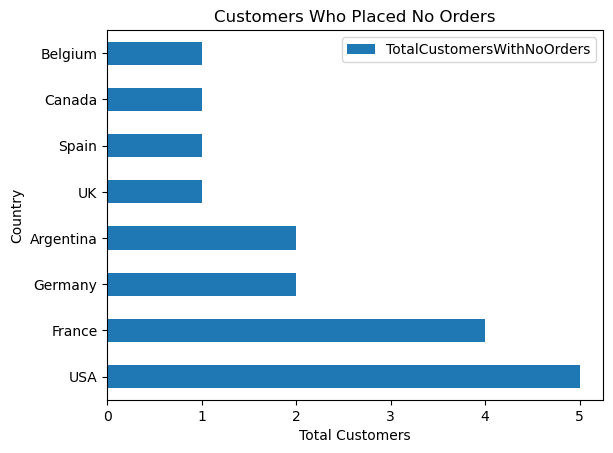

In [56]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'TotalCustomersWithNoOrders'])
print(df.to_string(index=False))

# TODO: Generate a visualization on this dataframe
df.plot.barh(x= 'Country', y = 'TotalCustomersWithNoOrders')
plt.title("Customers Who Placed No Orders")
plt.xlabel("Total Customers")
plt.ylabel("Country")
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
...

# TODO: Fetch your list of tuples and print it out
...

In [ ]:
# TODO: Convert your list of tuples to a dataframe
...

# TODO: Generate a visualization on this dataframe
...

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

[Answer Here]

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

[Answer Here]

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

[Answer Here]

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

[Answer Here]